## Problem Statement

- XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
- You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


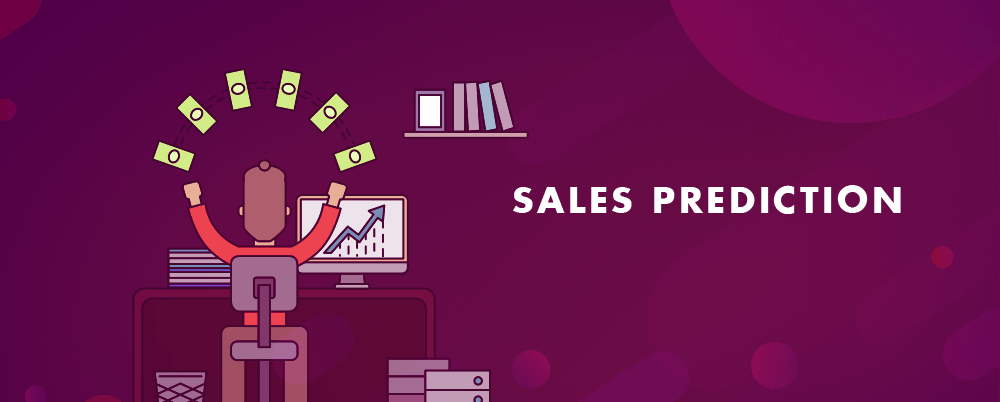

## Data Dictionary 1

- Id - an Id that represents a (Store, Date) duple within the set
- Store - a unique Id for each store
- Sales - the turnover for any given day (Dependent Variable)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- State Holiday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- School Holiday - indicates if the (Store) was affected by the closure of public schools
- Store Type - differentiates between 4 different store models: a, b, c, d



## Data Dictionary 2
- Assortment - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
- Competition Distance – the distance in meters to the nearest competitor store
- Competition Open Since[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2  Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- Promo Interval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, and November of any given year for that store.


## Approach

1. Problem Statement
2. Data collection and Preprocessing
3. Exploratory Data Analysis
4. Feature Selection and Outlier Detection
5. Modelling
6. Model performance and evaluation
7. Sales Prediction
8. Recommendation and Conclusion

In [1]:
# importing required libraries and modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.animation as animation
from datetime import datetime


sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Data Collection and Preprocessing

In [2]:
# Loading dataset - "Salesdata.csv"
sales_data = pd.read_csv("Salesdata.csv")

# first 5 rows of dataset
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [3]:
# Loading dataset - "store.csv"
store_data = pd.read_csv("store.csv")

#first look of dataset
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
sales_data.shape

(1017209, 9)

In [6]:
# date should be datetime datatype
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format = '%d-%m-%Y')

In [7]:
#CompetitionDistance should be float value
store_data['CompetitionDistance'] = store_data['CompetitionDistance'].astype(float)

In [8]:
sales_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
store_data.shape

(1115, 10)

In [11]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

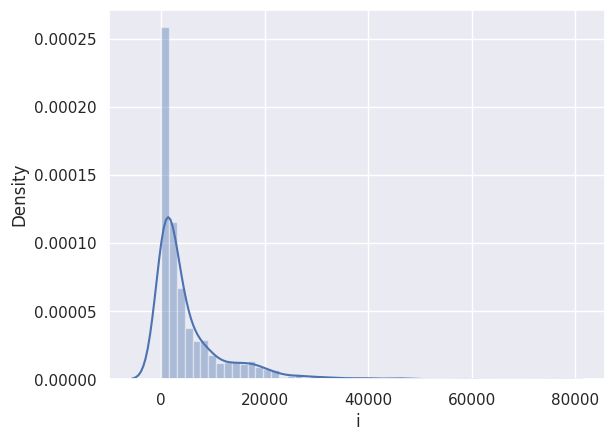

In [12]:
def distplot(i):
    sns.distplot(store_data[i])
    plt.xlabel("i")

distplot("CompetitionDistance")

In [13]:
store_data['CompetitionDistance'] = store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median())

In [14]:
for i in store_data.columns:
    if store_data[i].isnull().sum() != 0:
        print(store_data[i].value_counts())
        print("****"*9)

CompetitionOpenSinceMonth
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: count, dtype: int64
************************************
CompetitionOpenSinceYear
2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: count, dtype: int64
************************************
Promo2SinceWeek
14.0    81
40.0    77
31.0    44
10.0    42
5.0     39
1.0     35
37.0    35
13.0    34
45.0    34
22.0    33
18.0    29
35.0    25
9.0     14
27.0    11
36.0    10
48.0     9
39.0     6
23.0     5
44.0     3
6.0      1
26.0     1
50.0     1
49.0     1
28.0     1
Name: count, dtype: int64
************************************
Promo2SinceYear
2011.0    128
2013.0 

In [15]:
store_data['CompetitionOpenSinceMonth'] = store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode()[0])
store_data['CompetitionOpenSinceYear'] = store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode()[0])

In [16]:
store_data['Promo2SinceWeek'] = store_data['Promo2SinceWeek'].fillna(value = 0)
store_data['Promo2SinceYear'] = store_data['Promo2SinceYear'].fillna(value = 0)
store_data['PromoInterval'] = store_data['PromoInterval'].fillna(value = 0)

In [17]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [18]:
# Merging both dataset
dataset = sales_data.merge(store_data, on = 'Store', how = 'left' )

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [20]:
dataset.shape

(1017209, 18)

In [21]:
cat_val = []
for i in dataset.columns:
    if dataset[i].dtypes == 'object':
        cat_val.append(i)

In [22]:
cat_val

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [23]:
other_val = ['DayOfWeek', 'Open', 'SchoolHoliday','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
cat_val.extend(other_val)

In [24]:
for i in cat_val:
    print(f"Unique values in {i}: {dataset[i].unique()}")
    print("****"*10)

Unique values in StateHoliday: ['0' 'a' 'b' 'c' 0]
****************************************
Unique values in StoreType: ['c' 'a' 'd' 'b']
****************************************
Unique values in Assortment: ['a' 'c' 'b']
****************************************
Unique values in PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
****************************************
Unique values in DayOfWeek: [5 4 3 2 1 7 6]
****************************************
Unique values in Open: [1 0]
****************************************
Unique values in SchoolHoliday: [1 0]
****************************************
Unique values in CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
****************************************
Unique values in CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
****************************************
Unique valu

In [25]:
dataset['StateHoliday'].replace({'0': 0}, inplace = True)

In [26]:
# extract features from Date
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['WeekofYear'] = dataset['Date'].dt.isocalendar().week
dataset['DayofYear'] = dataset['Date'].dt.dayofyear

### Exploratory Data Analysis

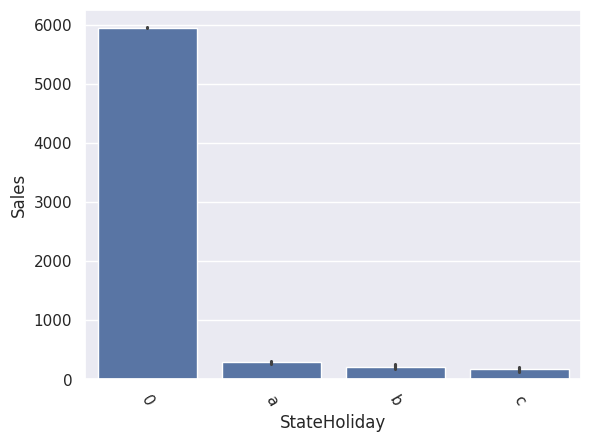

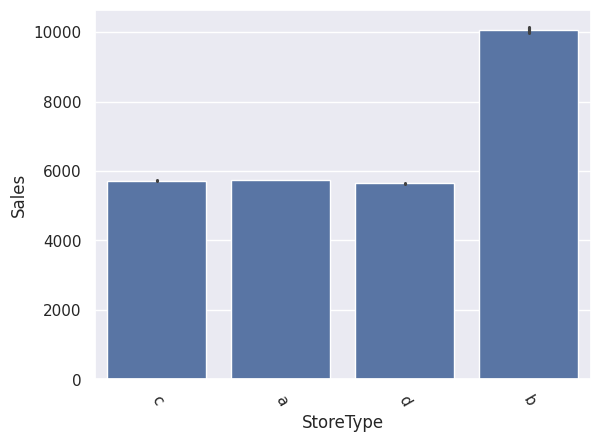

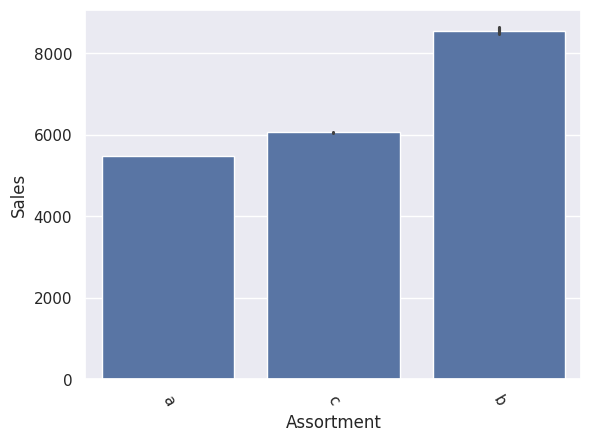

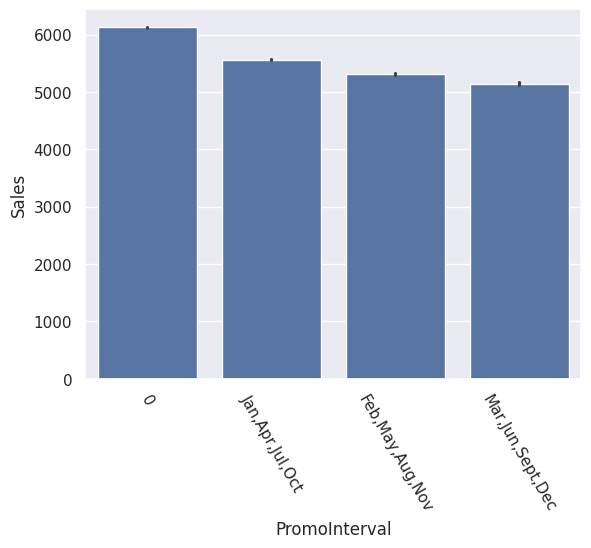

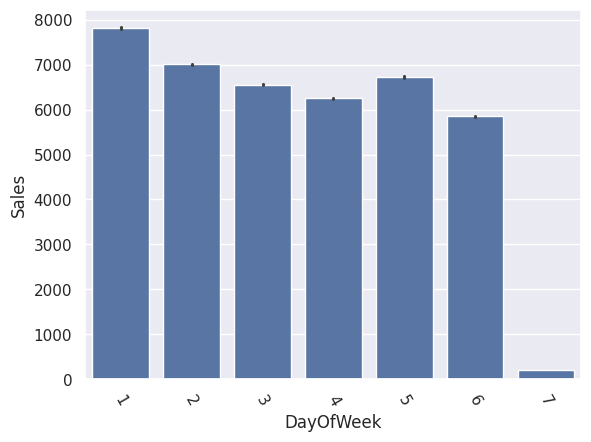

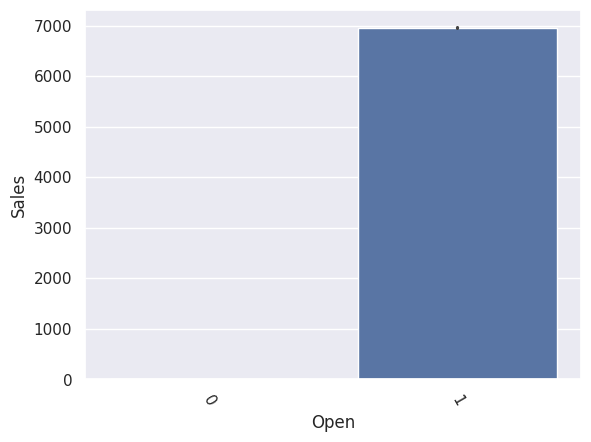

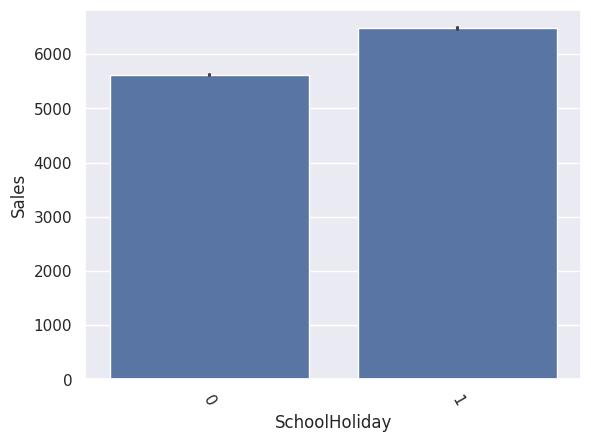

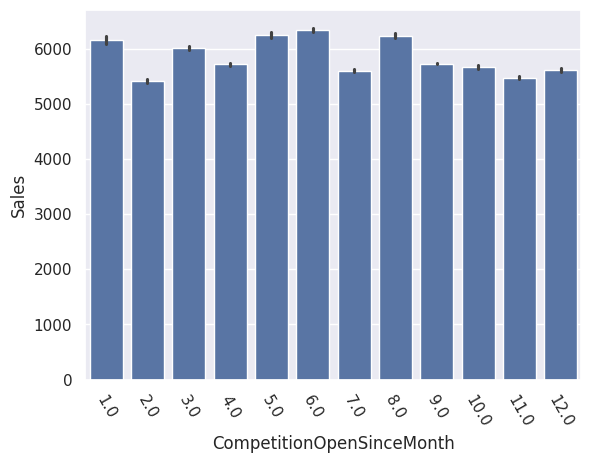

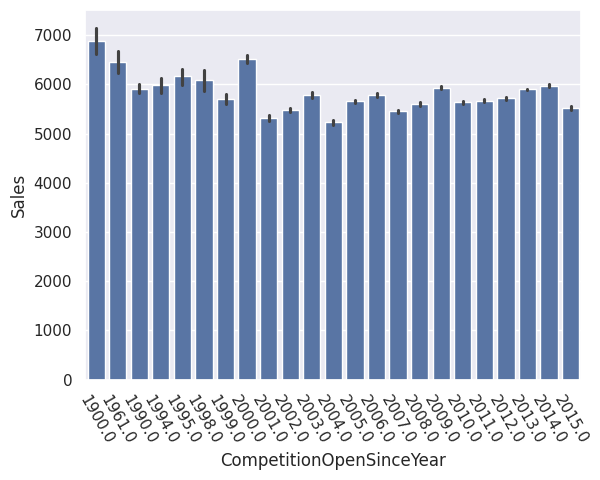

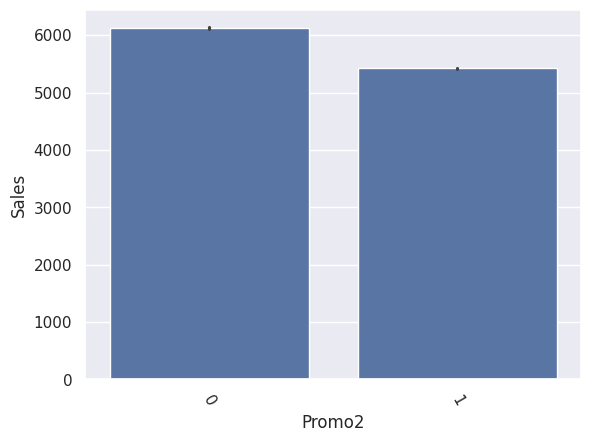

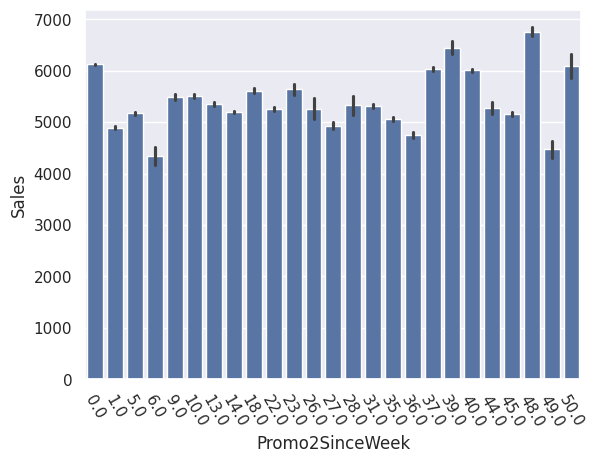

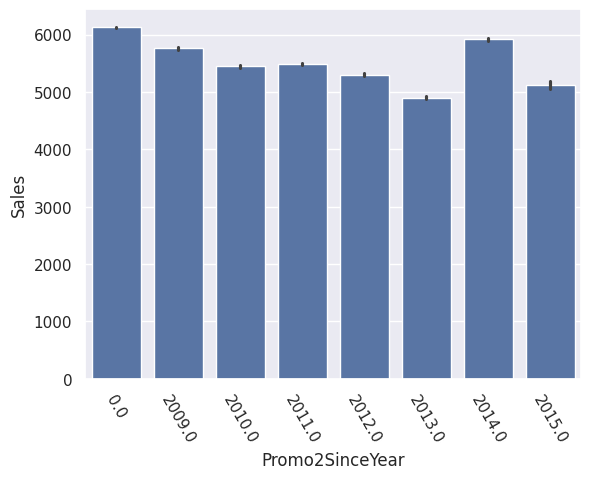

In [27]:
for i in cat_val:
    sns.barplot(x = dataset[i], y = dataset['Sales'])
    plt.xticks(rotation = -60)
    plt.show()

- When examining the correlation between State Holidays and sales, it's evident that sales peak during regular working days, while they significantly decline during holidays. Particularly, the highest sales occur on standard working days, contrasting with notably lower sales during holiday periods.

- Analysis of sales concerning Store Types reveals that 'b' type stores exhibit the highest sales volume, suggesting a substantial customer base attributed to various underlying factors, which we'll delve into further during subsequent analysis.

- Exploring the impact of Assortment on sales, we observe that 'b' type assortments, categorized as extra, dominate sales figures. Following this trend, 'c' assortment types precede 'a' assortment types, indicating a descending order in sales across the assortment categories.

- Regarding Promo Intervals and sales, periods with active promotions outperform those without. Notably, sales surge during promotional intervals, indicating a positive association between promotional activities and increased sales.

- Analyzing the relationship between Day of the Week and sales, Monday emerges as the peak sales day, whereas Sundays record the lowest sales. This discrepancy likely stems from store closures on Sundays, contributing to reduced sales figures.

- Considering School Holidays versus State Holidays, there's a discernible pattern where more stores remain open during School Holidays, resulting in higher sales compared to State Holidays. This suggests that School Holidays witness increased customer traffic and consequently higher sales volumes.

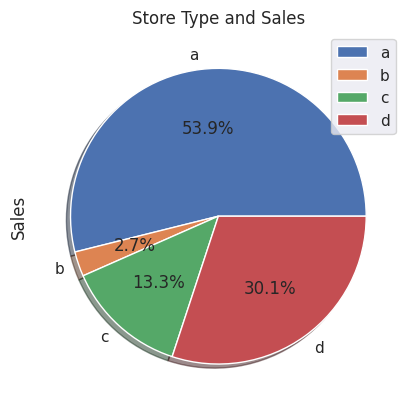

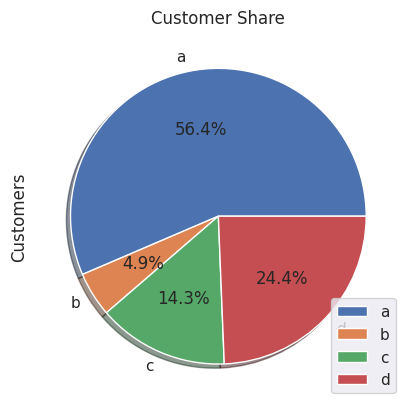

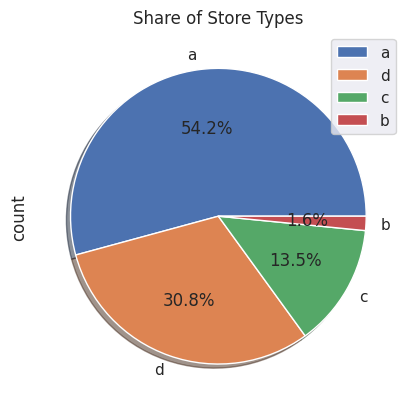

In [28]:
dataset.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
dataset.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
dataset["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

<Axes: xlabel='Customers', ylabel='Sales'>

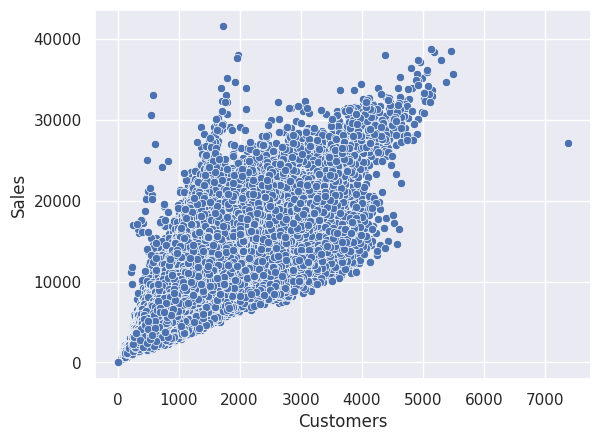

In [29]:
sns.scatterplot(x=dataset['Customers'], y=dataset['Sales'])

In [32]:
sales_2013 = dataset[dataset['Year'] == 2013]
sales_2014 = dataset[dataset['Year'] == 2014]
sales_2015 = dataset[dataset['Year'] == 2015]

sales_2013 = sales_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_2015.groupby('Month')['Sales'].sum().reset_index()

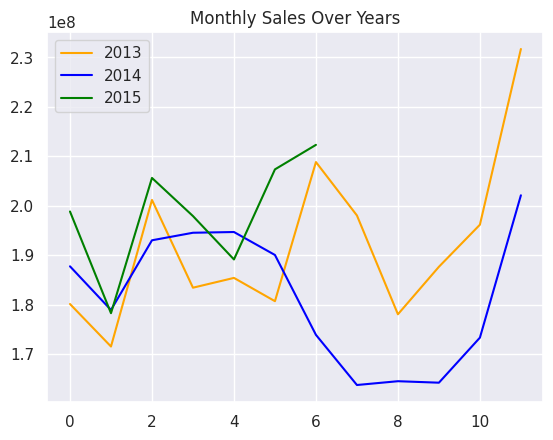

In [33]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

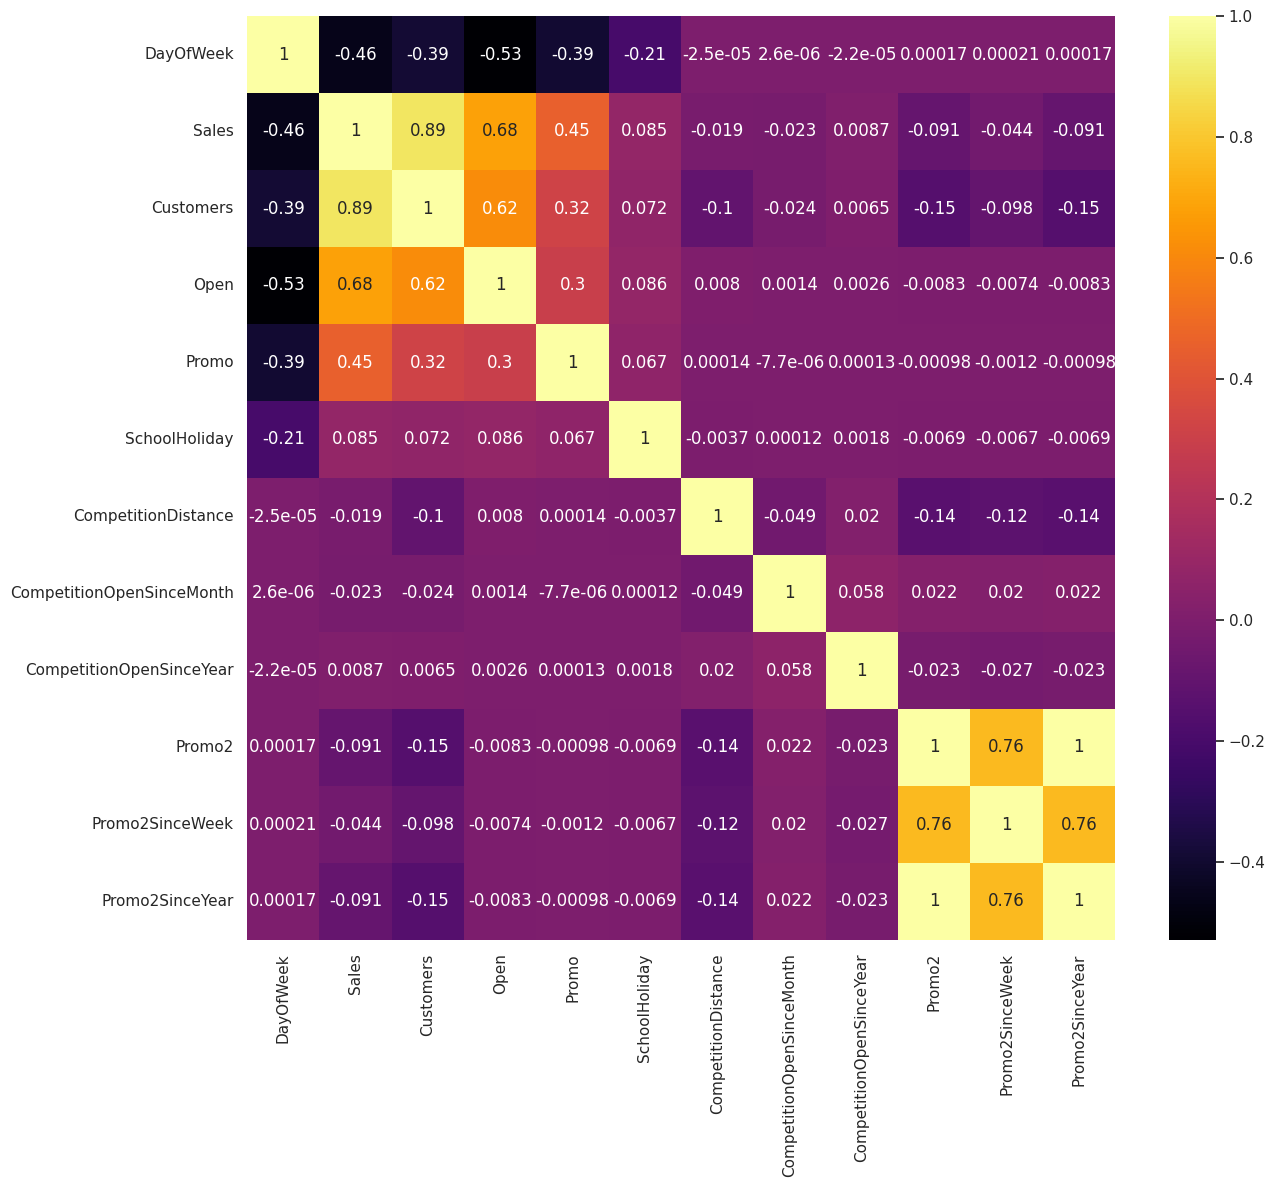

In [34]:
# correlation matrix
#we need to drop unwanted column hich are not useful for correlation
col_drop = ['Store', 'Year', 'WeekofYear', 'DayofYear', ]
corr_data = dataset.drop(columns = col_drop, axis = 1)
corr_data = corr_data.select_dtypes(include = ['int64', 'float64'])
#let's create correlation
plt.figure(figsize = (14,12))
sns.heatmap(corr_data.corr(), annot = True, cmap = 'inferno')
plt.show()

### Data Manipulation and Feature Engineering

In [35]:
# it is mentioned in problem statement - 'Note that some stores in the dataset were temporarily closed for refurbishment.'
# Also this was indicated in graph open vs sales

dataset2 = dataset[dataset['Open'] != 0]
dataset2.drop('Open', axis = 1, inplace = True)

In [36]:
dataset2.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekofYear,DayofYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


<Axes: ylabel='Density'>

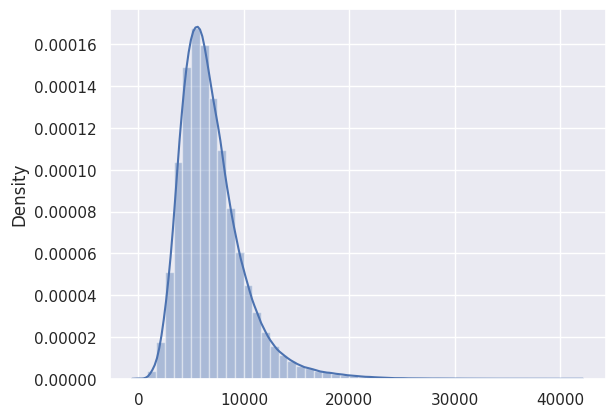

In [37]:
# let's see Sales distribution
sns.distplot(x = dataset2['Sales'])

<Figure size 1200x1000 with 0 Axes>

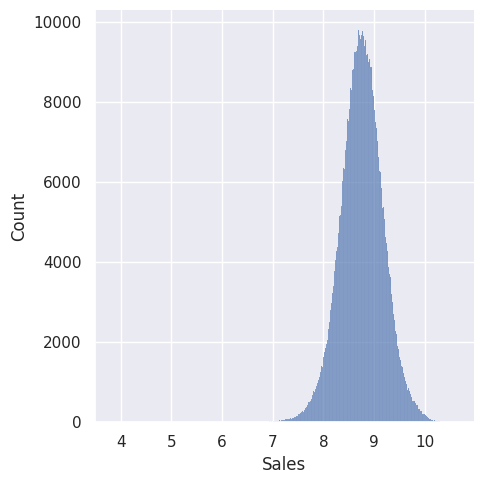

In [38]:
# we got Positively skewed graph let's normalize it using log transformation
dataset2['Sales'] = np.log(dataset2['Sales'])

#dropping null values
dataset2.dropna(inplace = True)

#dropping negative infinity value as well
dataset2.drop(dataset2[dataset2['Sales'] == float('-inf')].index, inplace = True)

#let's visualize changes that has been made
plt.figure(figsize = (12,10))
sns.displot(x = dataset2['Sales'])
plt.show()

In [39]:
# Let's check ategorical value
dataset2['StateHoliday'].value_counts()

StateHoliday
0    843428
a       694
b       145
c        71
Name: count, dtype: int64

In [40]:
dataset2['StateHoliday'] = dataset2['StateHoliday'].replace({'a':1, 'b':2, 'c':3})

In [41]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  float64       
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  int64         
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  float64       
 11  CompetitionOpenSinceMonth  844338 non-null  float64     

In [42]:
# lets make competition columns like CompetitionOpenSinceMonth, CompetitionOpenSinceYear
dataset2['Competition_Open'] = (dataset2['Year'] - dataset['CompetitionOpenSinceYear'])*12 + (dataset2['Month'] - dataset2['CompetitionOpenSinceMonth'])

#dealing with neg values
dataset['Competition_Open'] = dataset2['Competition_Open'].apply(lambda x:0 if x<0 else x)

#drop columns CompetitionOpenSinceMonth, CompetitionOpenSinceYear as we have converted them in one column
dataset2.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis = 1, inplace = True)

In [43]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                844338 non-null  int64         
 1   DayOfWeek            844338 non-null  int64         
 2   Date                 844338 non-null  datetime64[ns]
 3   Sales                844338 non-null  float64       
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  int64         
 7   SchoolHoliday        844338 non-null  int64         
 8   StoreType            844338 non-null  object        
 9   Assortment           844338 non-null  object        
 10  CompetitionDistance  844338 non-null  float64       
 11  Promo2               844338 non-null  int64         
 12  Promo2SinceWeek      844338 non-null  float64       
 13  Promo2SinceYear   

In [44]:
#let's make promo columns into single column to make it useful
dataset2['Promo_open'] = (dataset2['Year'] - dataset2['Promo2SinceYear'])*12 + ((dataset2['WeekofYear'] - dataset2['Promo2SinceWeek'])/4.345)

#clipping neg values
dataset2['Promo_open'] = dataset2['Promo_open'].apply(lambda x:0 if x<0 else x)*dataset2['Promo2']

#checking promo is running in sales month
def promo_in_sales(row):
    month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    try:
        month = row['PromoInterval'].split(',')
        if month_dict.get(row['PromoInterval']) in month:
            return 1
        else:
            return 0
    except:
        return 0

dataset2['promo_in_sales'] = dataset2.apply(promo_in_sales, axis =1)*dataset2['Promo2']

# dropping unessary columns - Promo2SinceWeek, Promo2SinceYear, PromoInterval
dataset2.drop(['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis =1, inplace = True)



In [45]:
dataset2.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekofYear,DayofYear,Competition_Open,Promo_open,promo_in_sales
0,1,5,2015-07-31,8.568456,555,1,0,1,c,a,1270.0,0,2015,7,31,212,82.0,0.000000,0
1,2,5,2015-07-31,8.710125,625,1,0,1,a,a,570.0,1,2015,7,31,212,92.0,64.142693,0
2,3,5,2015-07-31,9.025696,821,1,0,1,a,a,14130.0,1,2015,7,31,212,103.0,51.912543,0
3,4,5,2015-07-31,9.546455,1498,1,0,1,c,c,620.0,0,2015,7,31,212,70.0,0.000000,0
4,5,5,2015-07-31,8.480944,559,1,0,1,a,a,29910.0,0,2015,7,31,212,3.0,0.000000,0


In [46]:
dataset2.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekofYear,DayofYear,Competition_Open,Promo_open,promo_in_sales
0,1,5,2015-07-31,8.568456,555,1,0,1,c,a,1270.0,0,2015,7,31,212,82.0,0.000000,0
1,2,5,2015-07-31,8.710125,625,1,0,1,a,a,570.0,1,2015,7,31,212,92.0,64.142693,0
2,3,5,2015-07-31,9.025696,821,1,0,1,a,a,14130.0,1,2015,7,31,212,103.0,51.912543,0
3,4,5,2015-07-31,9.546455,1498,1,0,1,c,c,620.0,0,2015,7,31,212,70.0,0.000000,0
4,5,5,2015-07-31,8.480944,559,1,0,1,a,a,29910.0,0,2015,7,31,212,3.0,0.000000,0


### Outlier Detection

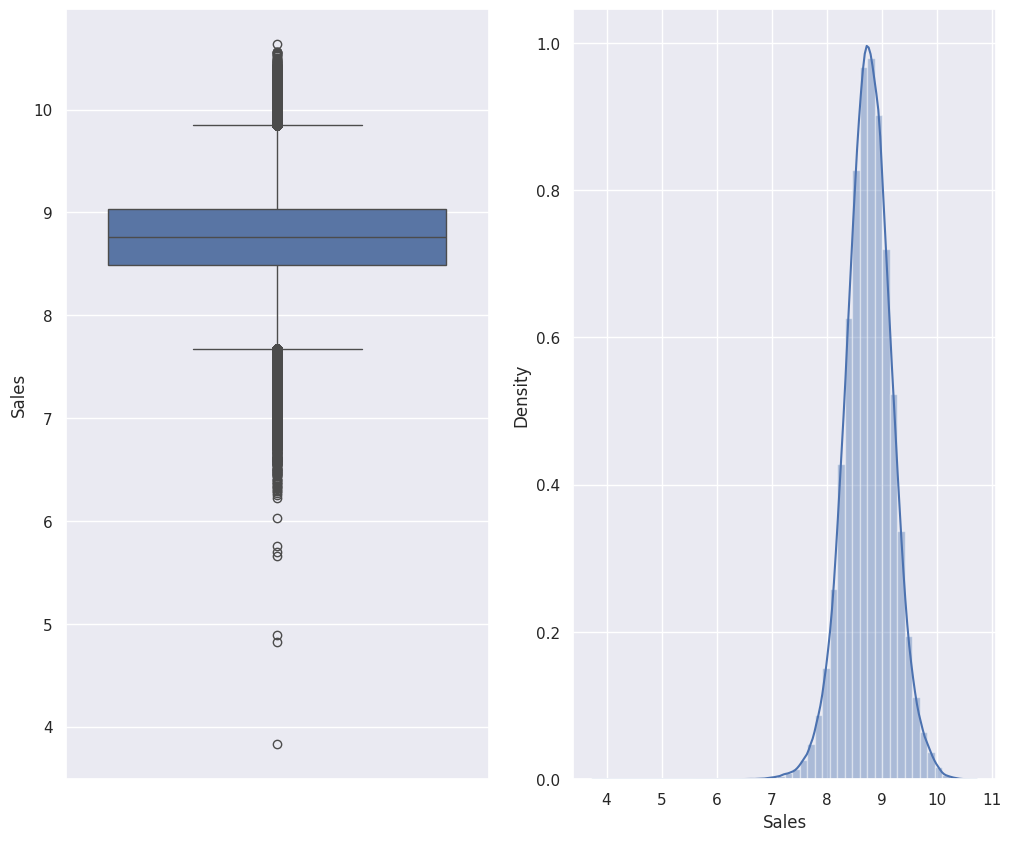

In [47]:
#Visualize the outliers present in sales column
plt.figure(figsize=(12,10))
plt.subplot(121)
sns.boxplot(dataset2['Sales'])

plt.subplot(122)
sns.distplot(dataset2['Sales'])

plt.show()

There are few outliers but we don't know reasons behind it. Previously we also seen that store type b was doing great sales so may be it was store type b making huge sales. Let's see if we can plot these outlier.
we can use either use Tukey's fences or z score method.
- we will use z score method as data se sensitive and normally skewed.

In [48]:
#let's set index for dataset
dataset2.set_index(['Date','Store'], inplace = True)
dataset2.sort_index(inplace = True)

In [49]:
## let's see using z-score method

mean_sales = np.mean(dataset2['Sales'])
std_sales = np.std(dataset2['Sales'])

threshold = 3
outlier_z_list = []
for i in dataset2['Sales']:
    z_score = (i - mean_sales)/std_sales
    if z_score > threshold:
        outlier_z_list.append(i)

print(f"Total number of outliers {len(outlier_z_list)}.")
print(f"The Percentage of outliers is {(len(outlier_z_list)/len(dataset2['Sales']))*100} ")
print(len([i for i in outlier_z_list if i>10.2]))

Total number of outliers 1559.
The Percentage of outliers is 0.18464169562426422 
429


[Text(0.5, 1.0, 'Distribution of outliers using z-Score')]

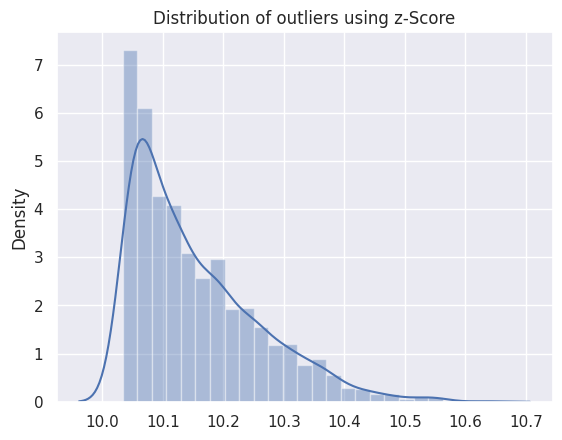

In [50]:
sns.distplot(x = outlier_z_list).set(title = "Distribution of outliers using z-Score")

Here we can see that values greater than 10.2 can be seen as outlier because very small percentage of amount i spresent in that area. so, by considering values greater than 10.2 as outlier we cna say that:

In [51]:
sales_outliers = dataset2.loc[dataset2['Sales']>10.2]
# let's calculate percentage of these outliers and value of sale from which outlier is considered

percentage_outlier = (len(sales_outliers)/len(dataset2['Sales'])*100)

#printing output
print(f"Percentage of outliers above 10.2 is {percentage_outlier}.")



Percentage of outliers above 10.2 is 0.050809036191667316.


[Text(0.5, 1.0, 'Distribution of Outlier Values')]

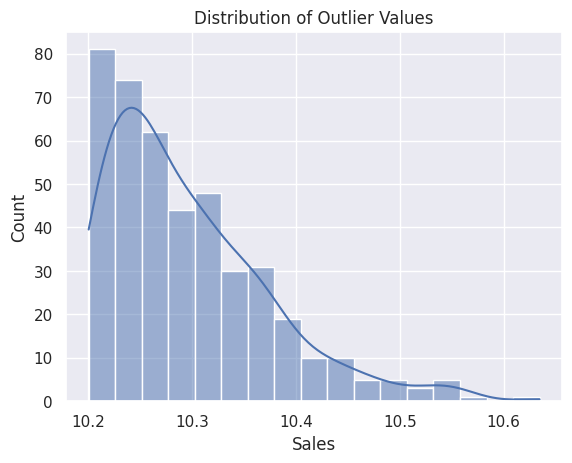

In [52]:
sns.histplot(sales_outliers['Sales'], kde=True).set(title='Distribution of Outlier Values')

In [53]:
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekofYear,DayofYear,Competition_Open,Promo_open,promo_in_sales
Date,Store,,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0,0,a,a,140.0,0,2013,1,2,7,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0,0,a,a,140.0,0,2013,1,2,8,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0,0,a,a,140.0,0,2013,1,4,21,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0,0,a,a,140.0,0,2013,1,4,22,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,-3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-13,1114,1,10.245516,3592,1,0,0,a,c,870.0,0,2015,7,29,194,22.0,0.0,0
2015-07-19,262,7,10.362967,4691,0,0,0,b,a,1180.0,0,2015,7,29,200,26.0,0.0,0
2015-07-26,262,7,10.390440,4783,0,0,0,b,a,1180.0,0,2015,7,30,207,26.0,0.0,0


In [54]:
# let's observe according to opening of store.
# Hypothese : - before we have seen that there were stores open on sundays so may be because of that store sales are going up.

sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekofYear,DayofYear,Competition_Open,Promo_open,promo_in_sales
Date,Store,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,-3.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,2013,2,6,41,-3.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,-2.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,2013,3,10,69,-2.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,2013,3,11,76,-2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,2015,7,27,186,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,2015,7,28,193,26.0,0.0,0


Here, we can see that most of store of type b. Let's see how many stores were open on sunday and are type b.

In [55]:
sales_outliers.loc[(sales_outliers['DayOfWeek']==7) & (sales_outliers['StoreType'] == 'b')]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekofYear,DayofYear,Competition_Open,Promo_open,promo_in_sales
Date,Store,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,-3.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,2013,2,6,41,-3.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,-2.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,2013,3,10,69,-2.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,2013,3,11,76,-2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,2015,7,27,186,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,2015,7,28,193,26.0,0.0,0


In [56]:
# let's observe above observation for whole dataset
dataset2.loc[(dataset2['DayOfWeek']==7) & (dataset2['StoreType'] == 'b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0             0   
           259            7   8.977904       1686      0             0   
           262            7  10.053630       3479      0             0   
           274            7   8.243283        932      0             0   
           335            7   8.883640       1310      0             0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0             0   
           769            7   9.312446       2783      0             0   
           948            7   9.395990       2346      0             0   
           1081           7   8.659734        875      0             0   
           1097           7   9.496045       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekofYear  DayofYear  \
Date       Store                                               
2013-01-06 85          0  2013      1           1          6   
           259         0  2013      1           1          6   
           262         0  2013      1           1          6   
           274         1  2013      1           1          6   
           335         1  2013      1           1          6   
...                  ...   ...    ...         ...        ...   
2015-07-26 733         0  2015      7          30        207   
           769         1  2015      7          30        207   
           948         0  2015      7          30        207   
           1081        0  2015      7          30        207   
           1097        0  2015      7          30        207   

                  Competition_Open  Promo_open  promo_in_sales  
Date       Store                                                
2013-01-06 85                 15.0    0.000000               0  
           259                -8.0    0.000000               0  
           262                -4.0    0.000000               0  
           274                -8.0    0.000000               0  
           335                -8.0    0.000000               0  
...                            ...         ...             ...  
2015-07-26 733               189.0    0.000000               0  
           769                22.0   31.857307               0  
           948                22.0    0.000000               0  
           1081              112.0    0.000000               0  
           1097              160.0    0.000000               0  

[2216 rows x 17 columns]

### One hot encoding

In [57]:
#importing module
from sklearn.preprocessing import LabelEncoder
enco = LabelEncoder()

#let's fit one hot encoder to categorical columns
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

label_encoders = {}
for i in categorical_cols:
    dataset2[i] = enco.fit_transform(dataset2[i])

    # Store the encoder to inverse transform later if needed
    label_encoders[i] = enco
dataset2.head(2)

DayOfWeek    Sales  Customers  Promo  StateHoliday  \
Date       Store                                                       
2013-01-01 85             1  8.34759        619      0             1   
           259            1  8.83215       1444      0             1   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-01-01 85                 1          1           0               1870.0   
           259                1          1           1                210.0   

                  Promo2  Year  Month  WeekofYear  DayofYear  \
Date       Store                                               
2013-01-01 85          0  2013      1           1          1   
           259         0  2013      1           1          1   

                  Competition_Open  Promo_open  promo_in_sales  
Date       Store                                                
2013-01-01 85                 15.0         0.0               0  
           259                -8.0         0.0               0

In [58]:
#let's copy the data in case of loss

dataset3 = dataset2.copy()
dataset3.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-01 85             1  8.347590        619      0             1   
           259            1  8.832150       1444      0             1   
           262            1  9.756552       2875      0             1   
           274            1  8.039802        729      0             1   
           335            1  7.783641        482      0             1   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-01-01 85                 1          1           0               1870.0   
           259                1          1           1                210.0   
           262                1          1           0               1180.0   
           274                1          1           1               3640.0   
           335                1          1           0                 90.0   

                  Promo2  Year  Month  WeekofYear  DayofYear  \
Date       Store                                               
2013-01-01 85          0  2013      1           1          1   
           259         0  2013      1           1          1   
           262         0  2013      1           1          1   
           274         1  2013      1           1          1   
           335         1  2013      1           1          1   

                  Competition_Open  Promo_open  promo_in_sales  
Date       Store                                                
2013-01-01 85                 15.0         0.0               0  
           259                -8.0         0.0               0  
           262                -4.0         0.0               0  
           274                -8.0         0.0               0  
           335                -8.0         0.0               0

Let's make train, test adn validation dataset.
- for test dataset, we will take most recent data i.e., about 6 months of data
- train and validation dataset we will train-test split

In [59]:
dataset3.tail(2)

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2015-07-31 1114           4  10.222232       3745      1             0   
           1115           4   9.068777        538      1             0   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2015-07-31 1114               1          0           2                870.0   
           1115               1          3           2               5350.0   

                  Promo2  Year  Month  WeekofYear  DayofYear  \
Date       Store                                               
2015-07-31 1114        0  2015      7          31        212   
           1115        1  2015      7          31        212   

                  Competition_Open  Promo_open  promo_in_sales  
Date       Store                                                
2015-07-31 1114               22.0    0.000000               0  
           1115               22.0   38.071346               0

so, dataset is between 2013 to 2015.

- test dataset: we take recent 6 weeks of data which mean between 2015-06-13 and 2015-07-31.
- training and validation dataset: we will take rest dataset as training dataset from which we will create validation dataset.


In [60]:
#as dataset doesn't need Customers column for prediction
dataset3.drop('Customers', axis =1, inplace = True)
# Train and test dataset
train_start = pd.to_datetime("2013-01-01")
train_end = pd.to_datetime("2015-06-14")
train_dataset = dataset3.loc[train_start:train_end]

test_start = pd.to_datetime("2015-06-13")
test_end = pd.to_datetime("2015-07-31")
test_dataset = dataset3.loc[test_start:test_end]

In [61]:
test_dataset.to_csv("test_dataset.csv")
train_dataset.to_csv("train_dataset.csv")

In [62]:
train_dataset.head()

DayOfWeek     Sales  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                            
2013-01-01 85             1  8.347590      0             1              1   
           259            1  8.832150      0             1              1   
           262            1  9.756552      0             1              1   
           274            1  8.039802      0             1              1   
           335            1  7.783641      0             1              1   

                  StoreType  Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                             
2013-01-01 85             1           0               1870.0       0  2013   
           259            1           1                210.0       0  2013   
           262            1           0               1180.0       0  2013   
           274            1           1               3640.0       1  2013   
           335            1           0                 90.0       1  2013   

                  Month  WeekofYear  DayofYear  Competition_Open  Promo_open  \
Date       Store                                                               
2013-01-01 85         1           1          1              15.0         0.0   
           259        1           1          1              -8.0         0.0   
           262        1           1          1              -4.0         0.0   
           274        1           1          1              -8.0         0.0   
           335        1           1          1              -8.0         0.0   

                  promo_in_sales  
Date       Store                  
2013-01-01 85                  0  
           259                 0  
           262                 0  
           274                 0  
           335                 0

In [63]:
# let's separate dependent and independent variable.
#X and y split for train and test
x_train = train_dataset.drop('Sales',axis=1)
y_train = train_dataset[['Sales']]
x_test = test_dataset.drop('Sales',axis=1)
y_test = test_dataset[['Sales']]


In [64]:
x_train.shape

(798486, 15)

In [65]:
x_test.shape

(46998, 15)

In [66]:
y_train.shape

(798486, 1)

In [67]:
y_test.shape

(46998, 1)

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
stdsc = StandardScaler()
x_train[list(x_train.columns)] = stdsc.fit_transform(x_train[list(x_train.columns)])
x_test[list(x_test.columns)] = stdsc.transform(x_test[list(x_test.columns)])

scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))


### Modelling: -

- Let's create a baseline model. Since the dataset does not exhibit linearity, linear regression is not suitable. Instead, we can use a decision tree as our baseline model.


#### Model 1: Decision Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Initializing empty list for evaluation metrics

mae_train_eval = []
mae_test_eval = []

mse_train_eval = []
mse_test_eval = []

r2_score_eval_train = []
r2_score_eval_test = []

rmse_train_eval = []
rmse_test_eval = []

#defining function to evaluate every model
def evaluation_metrics(model):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #mean absolute error
    mae_train = mean_absolute_error(y_pred_train, y_train)
    mae_test = mean_absolute_error(y_pred_test, y_test)


    #mean sqaured error
    mse_train = mean_squared_error(y_pred_train, y_train)
    mse_test = mean_squared_error(y_pred_test, y_test)

    # root mean squared error
    rmse_train = mean_squared_error(y_pred_train, y_train, squared = False)
    rmse_test = mean_squared_error(y_pred_test, y_test, squared = False)

    #r2 score
    r2_score_train = r2_score(y_pred_train, y_train)
    r2_score_test = r2_score(y_pred_test, y_test)


    # Appending evaluation list
    mae_train_eval.append(mae_train)
    mae_test_eval.append(mae_test)

    mse_train_eval.append(mse_train)
    mse_test_eval.append(mse_train)

    rmse_train_eval.append(rmse_train)
    rmse_test_eval.append(rmse_test)

    r2_score_eval_train.append(r2_score_train)
    r2_score_eval_test.append(r2_score_test)

    #printing values
    print(f"Mean Absolute Error of train : {mae_train}")
    print(f"Mean Absolute Error of test : {mae_test}")
    print("****" * 9)

    print(f"Mean Squared Error of train : {mse_train}")
    print(f"Mean Squared Error of test : {mse_test}")
    print("****" * 9)

    print(f"Root mean Squared Error of train : {rmse_train}")
    print(f"Root mean Squared Error of test : {rmse_test}")
    print("****" * 9)

    print(f"R2 score of train : {r2_score_train}")
    print(f"R2 score of test : {r2_score_test}")
    print("****" * 9)




In [71]:
evaluation_metrics(dtree)

Mean Absolute Error of train : 0.00022414496161213927
Mean Absolute Error of test : 0.02137090628253837
************************************
Mean Squared Error of train : 1.2260733715887525e-05
Mean Squared Error of test : 0.0009714971495270918
************************************
Root mean Squared Error of train : 0.0035015330522340533
Root mean Squared Error of test : 0.0311688490247409
************************************
R2 score of train : 0.996923797790756
R2 score of test : 0.7613753609970664
************************************


#### Model Performance Interpretation
1. Possible Overfitting: The notable disparity between the training and test performance metrics indicates that the model might be overfitting to the training data. Overfitting happens when a model captures the training data too precisely, including the noise, which leads to poor performance on new, unseen data.
2. Excellent Training Performance: The model shows outstanding performance on the training data, as evidenced by the very low MAE, MSE, and high R2 score. This suggests that the model is effectively capturing the underlying patterns within the training dataset.
3. Reasonable Generalization: Although the test performance metrics are not as impressive as the training metrics, they still demonstrate that the model has learned useful patterns. The relatively low MAE and RMSE on the test set, along with a good R2 score, indicate that the model explains a significant portion of the variance in the test data.

#### 2. Bagging Regressor

In [72]:
from sklearn.ensemble import BaggingRegressor
bgr = BaggingRegressor()
bgr.fit(x_train, y_train)

BaggingRegressor()

In [73]:
evaluation_metrics(bgr)

Mean Absolute Error of train : 0.005789630356381506
Mean Absolute Error of test : 0.01777745294487378
************************************
Mean Squared Error of train : 8.450627865570454e-05
Mean Squared Error of test : 0.000628971488830907
************************************
Root mean Squared Error of train : 0.009192729662929534
Root mean Squared Error of test : 0.025079303994148382
************************************
R2 score of train : 0.9777352610921546
R2 score of test : 0.8188959373479668
************************************


#### Model Performance Interpretation Bagging Regressor
1. Overfitting: There is a noticeable discrepancy between the training and test metrics, particularly the R² score, which suggests some overfitting. The model fits the training data slightly better than the test data. However, this level of overfitting is common for ensemble methods like Bagging. Despite this, the overall performance on the test set remains robust.
2. Error Magnitude: The low MAE, MSE, and RMSE on both the training and test sets indicate that the model's predictions are close to the actual values, with higher accuracy on the training set.
3. Variance Explained: The high R² score on the training set (97.73%) and the reasonably high R² score on the test set (81.88%) show that the model captures most of the variability in the data. While there is a drop in the test R² score, the model still performs well on unseen data.

#### 3.  Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
evaluation_metrics(rfr)

Mean Absolute Error of train : 0.005252429219421156
Mean Absolute Error of test : 0.01686858425460362
************************************
Mean Squared Error of train : 6.437551311351409e-05
Mean Squared Error of test : 0.0005623836315385212
************************************
Root mean Squared Error of train : 0.008023435243928507
Root mean Squared Error of test : 0.02371462906179477
************************************
R2 score of train : 0.9829404990282049
R2 score of test : 0.835119954703833
************************************


#### Model Performance Interpretation Random Forest Regressor
1. Overfitting: The model performs better on the training data compared to the test data, suggesting a slight overfitting. However, the performance drop from training to testing is not severe, indicating that the model generalizes well to unseen data.
2. Error Magnitude: The errors (MAE, MSE, RMSE) are all relatively low on both the training and test sets, which suggests that the model's predictions are close to the actual values.
3. Variance Explained: The high R² scores on both the training (98.29%) and test (83.15%) sets indicate that the model captures most of the variability in the data, particularly on the training set.

In [76]:
eval_list = ['mae_train_eval', 'mae_test_eval', 'mse_train_eval', 'mse_test_eval', 'r2_score_eval_train', 'r2_score_eval_test', 'rmse_train_eval', 'rmse_test_eval']

#creating dict to store data
eval_dict = {i: eval(i) for i in eval_list}

df_eval = pd.DataFrame(eval_dict)

#adding model name for each accuracy
model_name = ['Decision Tree', 'Bagging Regressor', 'Random Forest Regressor']
df_eval.insert(0, 'Model Name', model_name)

In [77]:
 df_eval

,Model Name,mae_train_eval,mae_test_eval,mse_train_eval,mse_test_eval,r2_score_eval_train,r2_score_eval_test,rmse_train_eval,rmse_test_eval
0,Decision Tree,0.000224,0.021371,0.000012,0.000012,0.996924,0.761375,0.003502,0.031169
1,Bagging Regressor,0.005790,0.017777,0.000085,0.000085,0.977735,0.818896,0.009193,0.025079
2,Random Forest Regressor,0.005252,0.016869,0.000064,0.000064,0.982940,0.835120,0.008023,0.023715


In [78]:
## for better visualization we can use plotly express library


df_long = df_eval.melt(id_vars='Model Name', var_name='Metric', value_name='Value')

fig = px.bar(df_long, x='Model Name', y='Value', color='Metric', barmode='group',
             title="Model Evaluation Metrics", labels={'Value': 'Performance Accuracy'})
fig.update_layout(legend=dict(title='Metrics', x=1.05, y=1), xaxis_title='Model Name', yaxis_title='Performance Accuracy')
fig.show()

In [79]:
df_eval.to_csv("Eval_data.csv")

Here, we can see Random Forest regressor is giving best result in both train and validation dataset. So, let's see by hyperparameter tunning how much we can increase its efficiency.

- Note: Remaining project is completed in next file 'Reatil_sales_Prediction_Part(2)'.(Due to limited computational power)